# Lab 10
## Rohan Nagar, Wenyang Fu

1. Let $\{w_t\} \sim N(0,1)$ be a white noise process. Consider the autoregressive process (this is a generative model):

$y_t = -a_1y_{t-1} - a_2y_{t-2} + w_t$.

a. Let $a_1 = \frac{3}{4}$ and $z_2 = \frac{1}{8}$. Generate and plot trajectories for this time series. Do you think it is WSS?

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
%matplotlib inline

In [37]:
def autoregression(mean, var, num_points, coef, init):
    points = []
    ys = init
    for _ in range(num_points):
        next_point = np.dot(coef, ys) + np.random.normal(0, 1)
        points.append(next_point)
        ys.pop()
        ys.insert(0, next_point)
    plt.plot(points)
    return points

In [12]:
a1 = -3/4
a2 = -1/8
y_minus1 = 1
y_minus2 = 0
coef = [a1, a2]
init = [y_minus1, y_minus2]
mean, var = (0, 1)

ar = partial(autoregression, mean, var, 1000, coef, init)

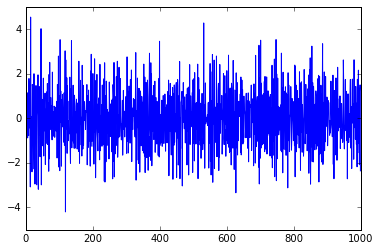

In [140]:
l = ar()

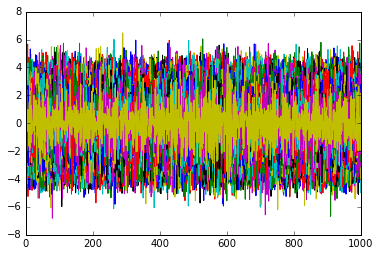

In [114]:
# Plot 1000 trajectories with the same initial conditions
trajectories = [ar() for _ in range(1000)]

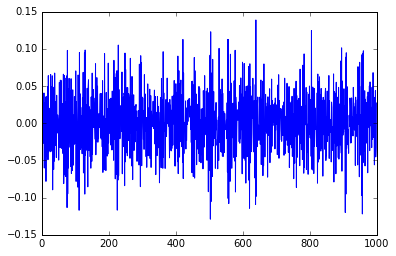

In [116]:
plt.plot(np.array(trajectories).mean(axis=0))

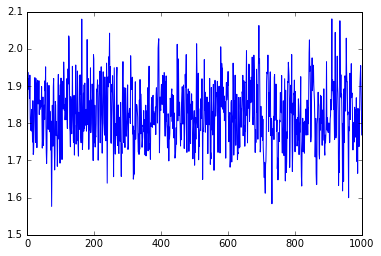

In [117]:
plt.plot(np.array(trajectories).var(axis=0))

In [118]:
a1 = -3/4
a2 = -1/8
y_minus1 = 1
y_minus2 = 1
coef = [a1, a2]
init = [y_minus1, y_minus2]
mean, var = (0, 1)
ar = partial(autoregression, mean, var, 1000, coef, init)

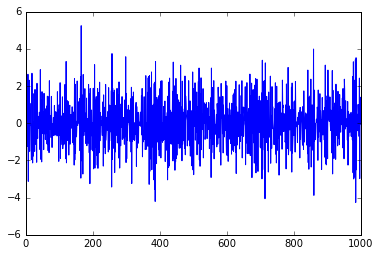

In [119]:
l = ar()

Yes, this process looks like it is WSS, since the signal is consistent noise.

How about $a_1 = -2.25$ and $a_2 = 0.5$? Is this WSS?

In [128]:
a1 = 9/4
a2 = -1/2
y_minus1 = 0.5
y_minus2 = 1
coef = [a1, a2]
init = [y_minus1, y_minus2]
mean, var = (0, 1)

ar2 = partial(autoregression, mean, var, 100, coef, init)

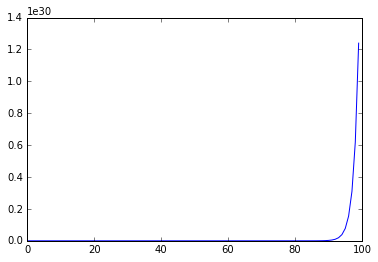

In [129]:
l = ar2()

This process is not WSS, since the signal is diverging, and the mean and varaince are changing over tiem.

Not WSS:

In [135]:
a1 = -3/4
a2 = -0.5
a3 = -0.5
a4 = -0.5
coef = [a1, a2, a3, a4]
init = [0, 0.5, 0.5, 1]
mean, var = (0, 1)

ar = partial(autoregression, mean, var, 1000, coef, init)

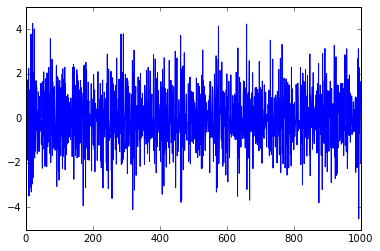

In [138]:
l = ar()

In [141]:
a1 = -3/4
a2 = -0.5
a3 = -0.5
a4 = -0.5
coef = [-.75, .5, -.1, .01]
init = [0, 0.5, 0.5, 1]
mean, var = (0, 1)

ar = partial(autoregression, mean, var, 1000, coef, init)

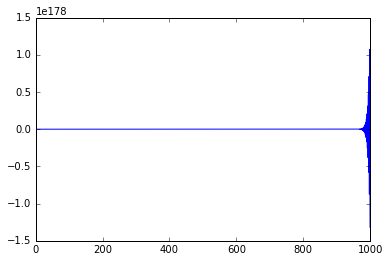

In [143]:
l = ar()